In [59]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.svm
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScalar
from sklearn.preprocessing import MinMaxScalar
import librosa
import librosa.display

import utils

plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
# Directory where mp3 are stored.
AUDIO_DIR = os.environ.get('fma_small')

# Load metadata and features.
tracks = utils.load('fma_metadata/tracks.csv')
genres = utils.load('fma_metadata/genres.csv')
features = utils.load('fma_metadata/features.csv')
echonest = utils.load('fma_metadata/echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

In [3]:
tracks['track'].head()

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,256000,0,NaN,2008-11-26 01:48:56,2008-01-01,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [4]:
tracks['album'].head()

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album
20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album


In [5]:
tracks['artist'].head()

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
2,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
3,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
5,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
10,NaT,NaT,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"[philly, kurt vile]",http://kurtvile.com,NaN
20,1990-01-01,2011-01-01,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"[instrumentals, experimental pop, post punk, e...",NaN,NaN


In [6]:
tracks['set'].head()

,split,subset
track_id,,
2,training,small
3,training,medium
5,training,small
10,training,small
20,training,large


In [7]:
tracks.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [14]:
#number of songs in dataset
len(tracks['artist','name'].unique().sum())

230700

In [24]:
tracks[ 'artist', 'name'].unique()

array(['AWOL', 'Kurt Vile', 'Nicky Cook', ...,
       'Alex Mason/BlackSunAeon Music', 'AWOTT', 'Spowder'], dtype=object)

In [27]:
genres.head(10)

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
6,914,38,Novelty,38
7,217,20,Comedy,20
8,868,0,Old-Time / Historic,8
9,1987,0,Country,9


In [28]:
features.head(10)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   
26           -0.699535 -0.684158  0.048825  0.042659 -0.818967 -0.917123   
30           -0.721487 -0.848560  0.890904  0.088620 -0.445513 -1.271170   
46           -0.119708 -0.858814  2.362546  0.106584 -1.315912 -1.220354   
48           -1.054053  0.932339  0.528064 -1.035338 -1.000682 -1.119304   
134           0.918445  0.674147  0.577818  1.281117  0.933746  0.078177   

feature                                              ...   tonnetz            \
statistics                                           ...       std             
number            07        08        09         10  ...        04        05   
track_id                                             ...                       
2           1.481593  2.691455  0.866868   1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103   0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617   1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217   1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851  -0.804761  ...  0.095003  0.022492   
26         -0.901834 -0.066845 -0.291037  -0.861782  ...  0.103717  0.025541   
30         -1.240190 -1.343765 -0.905600   2.671522  ...  0.141693  0.020426   
46         -1.668162 -0.516033 -0.536395  11.025053  ...  0.132632  0.033212   
48          1.166990 -1.002603 -1.094999  -0.725826  ...  0.141955  0.024654   
134         1.199204 -0.175223  0.925482   1.438509  ...  0.058766  0.016322   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   
26          0.023846  41.645809  0.250488  0.018388  0.015625  0.000000   
30          0.025418   8.166595  0.546875  0.054417  0.036133  0.002441   
46          0.021310  14.731083  0.223633  0.036601  0.032227  0.000000   
48          0.025203  24.550789  0.371582  0.033015  0.022461  0.000000   
134         0.015819   4.731087  0.419434  0.064370  0.050781  0.000000   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  
26          4.690596  0.014598  
30          2.244708  0.052674  
46          2.848736  0.020713  
48          4.406733  0.039016  
134         1.806106  0.054623  

[10 rows x 518 columns]

In [111]:
features.columns

MultiIndex([('chroma_cens', 'kurtosis', '01'),
            ('chroma_cens', 'kurtosis', '02'),
            ('chroma_cens', 'kurtosis', '03'),
            ('chroma_cens', 'kurtosis', '04'),
            ('chroma_cens', 'kurtosis', '05'),
            ('chroma_cens', 'kurtosis', '06'),
            ('chroma_cens', 'kurtosis', '07'),
            ('chroma_cens', 'kurtosis', '08'),
            ('chroma_cens', 'kurtosis', '09'),
            ('chroma_cens', 'kurtosis', '10'),
            ...
            (    'tonnetz',      'std', '04'),
            (    'tonnetz',      'std', '05'),
            (    'tonnetz',      'std', '06'),
            (        'zcr', 'kurtosis', '01'),
            (        'zcr',      'max', '01'),
            (        'zcr',     'mean', '01'),
            (        'zcr',   'median', '01'),
            (        'zcr',      'min', '01'),
            (        'zcr',     'skew', '01'),
            (        'zcr',      'std', '01')],
           names=['feature', 'statistics', 

In [44]:
features.corr()

feature                       chroma_cens                                \
statistics                       kurtosis                                 
number                                 01        02        03        04   
feature     statistics number                                             
chroma_cens kurtosis   01        1.000000  0.168040  0.072936  0.114748   
                       02        0.168040  1.000000  0.256776  0.581978   
                       03        0.072936  0.256776  1.000000  0.696866   
                       04        0.114748  0.581978  0.696866  1.000000   
                       05        0.087447  0.563089  0.243232  0.590232   
...                                   ...       ...       ...       ...   
zcr         mean       01       -0.001692 -0.001086 -0.005155 -0.000912   
            median     01        0.001103  0.003289  0.000021  0.002799   
            min        01        0.006344  0.004314  0.000966  0.000096   
            skew       01        0.025801  0.016010  0.019725  0.003503   
            std        01       -0.009808 -0.011634 -0.016049 -0.008062   

feature                                                                \
statistics                                                              
number                               05        06        07        08   
feature     statistics number                                           
chroma_cens kurtosis   01      0.087447  0.055913  0.093210  0.046958   
                       02      0.563089  0.374696  0.670683  0.249413   
                       03      0.243232  0.159603  0.208861  0.093052   
                       04      0.590232  0.412467  0.549015  0.193489   
                       05      1.000000  0.682713  0.530515  0.191569   
...                                 ...       ...       ...       ...   
zcr         mean       01     -0.004149 -0.000639 -0.000600 -0.001312   
            median     01      0.000900  0.005873  0.004010  0.004069   
            min        01     -0.000729 -0.000198  0.000075 -0.000354   
            skew       01      0.048093  0.012586  0.017420  0.023715   
            std        01     -0.009609 -0.009060 -0.007351 -0.009298   

feature                                            ...   tonnetz            \
statistics                                         ...       std             
number                               09        10  ...        04        05   
feature     statistics number                      ...                       
chroma_cens kurtosis   01      0.062980  0.135635  ... -0.021042 -0.016246   
                       02      0.277566  0.386960  ... -0.047317 -0.038900   
                       03      0.126101  0.108099  ... -0.046026 -0.030043   
                       04      0.183819  0.093965  ... -0.028608 -0.021130   
                       05      0.192796  0.222326  ... -0.036079 -0.027037   
...                                 ...       ...  ...       ...       ...   
zcr         mean       01      0.006950 -0.006680  ... -0.267163 -0.295029   
            median     01      0.015165 -0.000849  ... -0.263548 -0.297247   
            min        01      0.005019  0.006823  ... -0.061446 -0.098449   
            skew       01      0.030556  0.022298  ...  0.181227  0.215362   
            std        01     -0.010939 -0.016175  ... -0.105214 -0.104477   

feature                                       zcr                      \
statistics                               kurtosis       max      mean   
number                               06        01        01        01   
feature     statistics number                                           
chroma_cens kurtosis   01     -0.011776  0.059554 -0.005076 -0.001692   
                       02     -0.033791  0.027766 -0.013090 -0.001086   
                       03     -0.031115  0.034867 -0.015023 -0.005155   
                       04     -0.019762  0.013741 -0.012290 -0.000912   
                       

In [41]:
features.isnull().sum().sort_values(ascending=False)

feature      statistics  number
chroma_cens  kurtosis    01        0
mfcc         median      13        0
             skew        03        0
                         02        0
                         01        0
                                  ..
chroma_cqt   std         12        0
                         11        0
                         10        0
                         09        0
zcr          std         01        0
Length: 518, dtype: int64

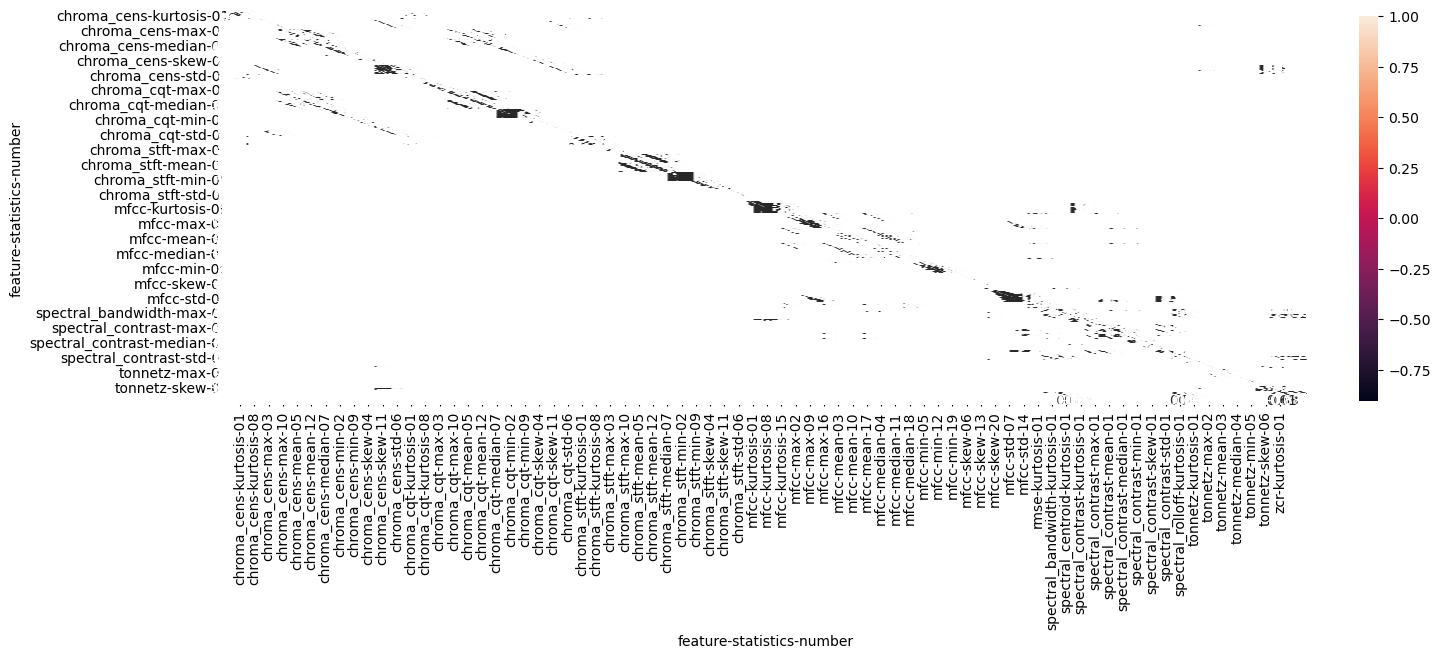

In [42]:
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [116]:
mfeat = features.groupby(['feature', 'statistics'], axis=1).mean()
mfeat

feature    chroma_cens                                                    \
statistics    kurtosis       max      mean    median       min      skew   
track_id                                                                   
2             2.082362  0.570171  0.260277  0.265482  0.000000 -0.485809   
3             1.040862  0.562011  0.266892  0.269250  0.000000  0.011989   
5             0.410283  0.551859  0.265505  0.261387  0.000000 -0.103725   
10            1.603768  0.553093  0.270363  0.270178  0.001891 -0.079567   
20           -0.196685  0.664679  0.247537  0.234057  0.000000  0.409265   
...                ...       ...       ...       ...       ...       ...   
155316        1.154337  0.591883  0.236086  0.233874  0.002541  0.388565   
155317       -0.330384  0.620357  0.238316  0.236438  0.000008  0.179532   
155318        0.418231  0.628380  0.260296  0.257394  0.000079  0.254626   
155319       -0.108867  0.615697  0.263989  0.243265  0.007469  0.459516   
155320       -0.014882  0.620793  0.259474  0.246760  0.002188  0.393354   

feature              chroma_cqt                 ...   tonnetz            \
statistics       std   kurtosis  max      mean  ...       min      skew   
track_id                                        ...                       
2           0.083961  -0.092460  1.0  0.540719  ... -0.102553  0.034624   
3           0.087131  -0.525478  1.0  0.568995  ... -0.121077  0.074390   
5           0.098261  -0.700092  1.0  0.554150  ... -0.160749 -0.021525   
10          0.081247  -0.317063  1.0  0.607028  ... -0.166928 -0.013220   
20          0.141857  -0.910047  1.0  0.495025  ... -0.209229  0.020681   
...              ...        ...  ...       ...  ...       ...       ...   
155316      0.117306   0.672790  1.0  0.426605  ... -0.197995 -0.437016   
155317      0.139340  -0.421697  1.0  0.460939  ... -0.210908 -0.007739   
155318      0.105142  -0.610874  1.0  0.521038  ... -0.193903 -0.107406   
155319      0.111359  -0.898425  1.0  0.551253  ... -0.151796  0.000791   
155320      0.119474  -0.783610  1.0  0.522278  ... -0.149781 -0.013931   

feature                     zcr                                          \
statistics       std   kurtosis       max      mean    median       min   
track_id                                                                  
2           0.027802   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.031993   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.033306   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.041305  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.052148  16.669037  0.469727  0.047225  0.040039  0.000977   
...              ...        ...       ...       ...       ...       ...   
155316      0.054275   4.448255  0.172852  0.028773  0.028320  0.003906   
155317      0.066194   3.270612  0.196289  0.031116  0.027832  0.002441   
155318      0.048086   2.356727  0.212891  0.038450  0.037109  0.003418   
155319      0.043839   6.188604  0.167480  0.041480  0.038086  0.004883   
155320      0.046086  21.756050  0.845215  0.075141  0.044434  0.004395   

feature                         
statistics      skew       std  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  
...              ...       ...  
155316      0.955388  0.012385  
155317      1.283060  0.019059  
155318      0.828569  0.017904  
155319      1.818740  0.020133  
155320      4.687204  0.137205  

[106574 rows x 77 columns]

In [46]:
mfeat.corr()

feature                chroma_cens                                          \
statistics                kurtosis       max      mean    median       min   
feature     statistics                                                       
chroma_cens kurtosis      1.000000 -0.095039 -0.058955 -0.030774  0.054971   
            max          -0.095039  1.000000 -0.334662 -0.397183 -0.664216   
            mean         -0.058955 -0.334662  1.000000  0.939423  0.315065   
            median       -0.030774 -0.397183  0.939423  1.000000  0.288351   
            min           0.054971 -0.664216  0.315065  0.288351  1.000000   
...                            ...       ...       ...       ...       ...   
zcr         mean         -0.005107 -0.128079  0.337527  0.302573  0.179557   
            median        0.002981 -0.158107  0.352852  0.313006  0.207729   
            min           0.004654 -0.163766  0.120021  0.090570  0.292606   
            skew          0.041367  0.061435 -0.239313 -0.221027 -0.062935   
            std          -0.019649  0.033708  0.078832  0.080679 -0.015457   

feature                                    chroma_cqt                      \
statistics                  skew       std   kurtosis       max      mean   
feature     statistics                                                      
chroma_cens kurtosis    0.561482 -0.095914   0.527839 -0.279801 -0.034331   
            max         0.265158  0.725935  -0.082851  0.206225 -0.403076   
            mean       -0.537574 -0.729048  -0.118652  0.146100  0.954926   
            median     -0.598045 -0.762607  -0.087609  0.101976  0.904665   
            min        -0.026120 -0.566830   0.055138 -0.176391  0.373083   
...                          ...       ...        ...       ...       ...   
zcr         mean       -0.145162 -0.267394  -0.026505  0.043467  0.355836   
            median     -0.148414 -0.296521  -0.018788  0.031101  0.365625   
            min         0.009051 -0.139930   0.000507 -0.023440  0.111487   
            skew        0.148089  0.160196   0.065846 -0.053214 -0.236503   
            std        -0.052150 -0.017227  -0.026329  0.052880  0.107331   

feature                 ...   tonnetz                           zcr            \
statistics              ...       min      skew       std  kurtosis       max   
feature     statistics  ...                                                     
chroma_cens kurtosis    ...  0.040891 -0.009445 -0.055155  0.088585 -0.019798   
            max         ... -0.753068 -0.051682  0.560961 -0.020943  0.153366   
            mean        ...  0.537584  0.061642 -0.754733 -0.122498  0.000664   
            median      ...  0.537924  0.062036 -0.758007 -0.107319 -0.007080   
            min         ...  0.569001  0.029323 -0.444125  0.004622 -0.097158   
...                     ...       ...       ...       ...       ...       ...   
zcr         mean        ...  0.217447  0.037174 -0.308788 -0.192219  0.302725   
            median      ...  0.226980  0.029454 -0.310859 -0.161773  0.151493   
            min         ...  0.154509 -0.037456 -0.090205  0.009136 -0.015115   
            skew        ... -0.139136 -0.019111  0.216441  0.785132  0.435548   
            std         ...  0.048086  0.042308 -0.104093 -0.111815  0.678842   

feature                                                                   
statistics                  mean    median       min      skew       std  
feature     statistics                                                    
chroma_cens kurtosis   -0.005107  0.002981  0.004654  0.041367 -0.019649  
            max        -0.128079 -0.158107 -0.163766  0.061435  0.033708  
            mean        0.337527  0.352852  0.120021 -0.239313  0.078832  
            median      0.302573  0.313006  0.090570 -0.221027  0.080679  
            min         0.179557  0.207729  0.292606 -0.062935 -0.015457  
...                          ...       ...       ...       ...       ...  
zcr         mean  

In [110]:
features.groupby(['feature', 'statistics']).size()

KeyError: 'feature'

In [ ]:
genres.groupby('top_level')['#tracks'].sum().sort_values(ascending=False)

In [ ]:
print('{} top-level genres'.format(len(genres['top_level'].unique())))
genres.loc[genres['top_level'].unique()].sort_values('#tracks', ascending=False)

In [55]:
small = tracks['set', 'subset'] <= 'small'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

X_train = features.loc[small & train]
X_test = features.loc[small & test]

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]


print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

6400 training examples, 800 testing examples
518 features, 8 classes


In [50]:
clf = skl.svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

Accuracy: 40.50%


In [ ]:
small

In [ ]:
smallSub = tracks[tracks['set', 'subset'] <= 'small']
smallSub

In [ ]:
smallSub.columns

In [ ]:
smallSub['track','genre_top'].value_counts()

In [ ]:
plt.show(track['track', 'genre_top'].value_counts())

In [ ]:
smallSubDist = smallSub['track', 'genre_top'].value_counts()
plt.barh(smallSubDist.index, width = smallSubDist.values)

In [ ]:
medSub = tracks[tracks['set', 'subset'] <= 'medium']
medSub

In [ ]:
medSub['track','genre_top'].value_counts()

In [ ]:
medSubDist = medSub['track', 'genre_top'].value_counts()
plt.barh(medSubDist.index, width = medSubDist.values)

In [53]:
# Be sure training samples are shuffled.
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)

# Standardize features by removing the mean and scaling to unit variance.
scaler = skl.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

Accuracy: 41.50%


In [54]:
clf = skl.svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

Accuracy: 46.38%


In [84]:
pca = PCA(n_components = 1)
pca.fit_transform(X_train)
pca.transform(X_test)

array([[-1.05026006e+03],
       [ 4.49514066e+03],
       [ 3.73900044e+03],
       [ 3.24666402e+03],
       [ 2.41432614e+03],
       [ 3.11174471e+03],
       [ 5.99700600e+02],
       [-1.88251272e+03],
       [-2.50875291e+03],
       [ 1.53254053e+03],
       [ 2.42778444e+03],
       [ 1.83875738e+03],
       [ 2.46239871e+03],
       [-1.01299353e+03],
       [ 1.59516641e+03],
       [-1.95636754e+02],
       [ 1.58515989e+02],
       [ 2.71259538e+03],
       [ 6.41579613e+01],
       [ 2.56880886e+03],
       [ 7.52809148e+02],
       [ 1.50972655e+03],
       [ 2.17928065e+03],
       [ 9.14891065e+02],
       [-1.98053358e+03],
       [ 6.48983177e+03],
       [ 1.68903083e+03],
       [ 2.57232001e+03],
       [-7.22335944e+02],
       [ 3.89091254e+03],
       [ 3.31950968e+03],
       [-1.91567801e+02],
       [-2.71164062e+03],
       [-2.25773794e+03],
       [-1.34989012e+03],
       [-1.95792804e+03],
       [-1.76718332e+03],
       [-1.30119170e+03],
       [-1.5

In [104]:
clf = skl.svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

Accuracy: 37.00%


In [86]:
estimators_list = [50, 100, 200, 300, 400]

for n_estimators in estimators_list:
    # Random Forest
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('Number of Estimators: {}, Accuracy: {:.2%}'.format(n_estimators, score))

Number of Estimators: 50, Accuracy: 43.00%
Number of Estimators: 100, Accuracy: 46.50%
Number of Estimators: 200, Accuracy: 48.38%
Number of Estimators: 300, Accuracy: 48.25%
Number of Estimators: 400, Accuracy: 47.50%


In [ ]:
'''
Author: Ramita Rathore
Fundamentals of Data Science - Final Project - Prototype
Code written in this cell is taken from and referenced from the class powerpoint "9A - Decision Trees in Python" on iCollege. 
'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# reading the tracks file
readTracks = pd.read_csv("fma_metadata/tracks.csv", sep=",")
print("Reading Tracks File")
print(readTracks.head())
print(readTracks.shape)

# reading the genres file
readGenre = pd.read_csv("fma_metadata/genres.csv", sep=",")
print("Reading Genres File")
print(readGenre.head())
print(readGenre.shape)

# reading the features file
readFeatures = pd.read_csv("fma_metadata/features.csv", sep=",")
print("Reading Features File")
print(readFeatures.head())
print(readFeatures.shape)

# plotting the histogram for the features
readFeatures["chroma_cens"].plot.hist(bins = 10)
readFeatures["chroma_cqt"].plot.hist(bins = 10)
readFeatures["chroma_stft"].plot.hist(bins = 10)
readFeatures["mfcc"].plot.hist(bins = 10)
readFeatures["rmse"].plot.hist(bins = 10)
readFeatures["spectral_bandwidth"].plot.hist(bins = 10)
readFeatures["spectral_centroid"].plot.hist(bins = 10)
readFeatures["spectral_contrast"].plot.hist(bins = 10)
readFeatures["spectral_rolloff"].plot.hist(bins = 10)
readFeatures["tonnetz"].plot.hist(bins = 10)
readFeatures["zcr"].plot.hist(bins = 10)

# using seaborn to make a pairplot for our features 
sns.set(style="ticks")
sns.pairplot(readFeatures, hue="Class")


sns.set(style='whitegrid', context ='notebook')
cols = ["chroma_cens", "chroma_cqt", "chroma_stft", "mfcc", "rmse", "spectral_bandwidth",
        "spectral_centroid", "spectral_contrast", "spectral_rolloff", "tonnetz", "zcr"]
sns.pairplot(readFeatures, hue="TrainingClass", height=2.0);
plt.show()

'''
Author: Ramita Rathore
Fundamentals of Data Science - Final Project - Prototype
Code written in this cell is taken from and referenced from the class powerpoint "9A - Decision Trees in Python" on iCollege. 
'''


In [ ]:
print('{1} features for {0} tracks'.format(*features.shape))
columns = ['mfcc', 'chroma_cens', 'tonnetz', 'spectral_contrast']
columns.append(['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff'])
columns.append(['rmse', 'zcr'])
for column in columns:
    ipd.display(features[column].head().style.format('{:.2f}'))

In [ ]:
readFeatures["chroma_cens"].plot.hist(bins = 10)

In [ ]:
'''
author: ramita rathore
data preprocessing
code in this cell is referenced from https://scikit-learn.org/stable/modules/preprocessing.html and 
https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/

'''


# Training dataset
X_Train = np.array() # figure out how to send features into this
Y_Train = np.array() # figure out how to send test features into this
minMaxScalar = preprocessing.MinMaxScalar(feature_range = (0,1))

# scaling the data to range 0 and 1
X_Train = minMaxScalar.fit_transform(X_Train)













































